In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 500)


/home/stanislav/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
train_df = pd.read_csv("BBC News Train.csv")
test_df = pd.read_csv("BBC News Test.csv")


## EDA

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [5]:
train_df.head(5)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness. cynthia cooper worldcom s ex-head of internal accounting alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and co...,business
1,154,german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy. munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking...,business
2,1101,bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service poll believe the world economy is worsening. most respondents also said their national economy was getting worse. but when asked about their own family s financial outlook a majority in 14 countries said they were positive about the future. almost 23 000 people in 22 countries were questioned for the poll which was mostly conducted before the asian tsunami disaster. the poll found that a ma...,business
3,1976,lifestyle governs mobile choice faster better or funkier hardware alone is not going to help phone firms sell more handsets research suggests. instead phone firms keen to get more out of their customers should not just be pushing the technology for its own sake. consumers are far more interested in how handsets fit in with their lifestyle than they are in screen size onboard memory or the chip inside shows an in-depth study by handset maker ericsson. historically in the industry the...,tech
4,917,enron bosses in $168m payout eighteen former enron directors have agreed a $168m (£89m) settlement deal in a shareholder lawsuit over the collapse of the energy firm. leading plaintiff the university of california announced the news adding that 10 of the former directors will pay $13m from their own pockets. the settlement will be put to the courts for approval next week. enron went bankrupt in 2001 after it emerged it had hidden hundreds of millions of dollars in debt. before its colla...,business


In [6]:
test_df.head(5)

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park rangers keeper chris day is set to join preston on a month s loan. day has been displaced by the arrival of simon royce who is in his second month on loan from charlton. qpr have also signed italian generoso rossi. r s manager ian holloway said: some might say it s a risk as he can t be recalled during that month and simon royce can now be recalled by charlton. but i have other irons in the fire. i have had a yes from a couple of others shou...
1,1319,software watching while you work software that can not only monitor every keystroke and action performed at a pc but also be used as legally binding evidence of wrong-doing has been unveiled. worries about cyber-crime and sabotage have prompted many employers to consider monitoring employees. the developers behind the system claim it is a break-through in the way data is monitored and stored. but privacy advocates are concerned by the invasive nature of such software. the system is a joint...
2,1138,d arcy injury adds to ireland woe gordon d arcy has been ruled out of the ireland team for saturday s six nations clash against scotland in murrayfield. like skipper brian o driscoll d arcy failed to recover from a hamstring injury. the side will now be led by munster lock paul o connell. shane horgan switches from wing to centre where he will be joined by ulster s kevin maggs. girvan dempsey comes into the team to take the right wing spot while gavin duffy is called up to the replacements...
3,459,india s reliance family feud heats up the ongoing public spat between the two heirs of india s biggest conglomerate reliance group has spilled over to the board meeting of a leading company within the group. anil ambani vice-chairman of india petrochemicals limited (ipcl) stayed away from a gathering of senior managers on thursday. the move follows a decision earlier this month by anil - the younger brother of reliance group president mukesh ambani - to resign from his post. his resigna...
4,1020,boro suffer morrison injury blow middlesbrough midfielder james morrison has been ruled out for up to eight weeks after an operation on tuesday. the 18-year-old who has played in 13 of the club s last 14 games had surgery to repair a double hernia. a club spokesman confirmed: it is a bilateral sportsman s hernia which was operated on yesterday. morrison was sent for scans after being substituted at half-time during boro s 2-1 uefa cup win over graz ak in which he scored the equaliser. ...


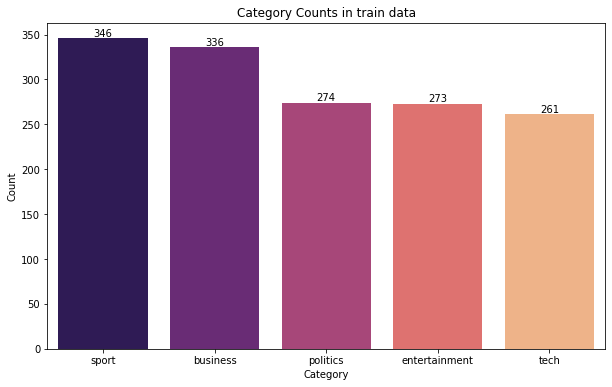

In [7]:
category_counts = train_df["Category"].value_counts()
colors = sns.color_palette("magma", len(category_counts))

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette=colors)

for i, count in enumerate(category_counts.values):
    ax.text(i, count + 0.2, str(count), ha='center', va='bottom')

plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Counts in train data")

plt.show()

In [8]:
#example of news


def read_ith_news(train_df, i):
    print("Example of news:\n", train_df.iloc[i]["Text"], "\n\n Category = ", train_df.iloc[i]["Category"])
    
    
read_ith_news(train_df, 6)

Example of news:
 wales silent on grand slam talk rhys williams says wales are still not thinking of winning the grand slam despite a third six nations win.   that s the last thing on our minds at the moment   said williams  a second- half replacement in saturday s 24-18 win over france in paris.  we all realise how difficult a task it is to go up to scotland and beat them.  we ve come unstuck there a couple of times recently so our focus is on that game and we ll worry about ireland hopefully after we ve beaten scotland.  with captain gareth thomas ruled out of the rest of the campaign with a broken thumb  williams is vying for his first start in the championship so far.  kevin morgan is probably favourite to replace thomas at full-back  leaving williams and hal luscombe to battle for the right wing berth. a hamstring injury denied luscombe the opportunity to make a third successive start  but the dragons winger is expected to be fit for the trip to murrayfield on 13 march. hooker rob

In [9]:

count_words =  lambda s: len(s.split())



train_df["n_words"] = train_df["Text"].apply(count_words)
test_df["n_words"] = test_df["Text"].apply(count_words)

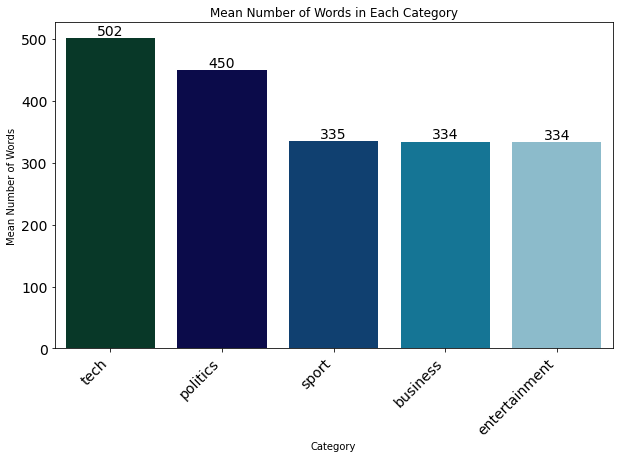

In [10]:


words_in_each = train_df.groupby("Category")["n_words"].mean().sort_values(ascending=False)
colors = sns.color_palette("ocean", len(words_in_each))

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=words_in_each.index, y=words_in_each.values, palette=colors)

for i, mean_words in enumerate(words_in_each.values):
    ax.text(i, mean_words + 0.2, f"{mean_words:.0f}", ha='center', va='bottom', fontsize=14)

plt.xlabel("Category",)
plt.ylabel("Mean Number of Words")
plt.title("Mean Number of Words in Each Category")

plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

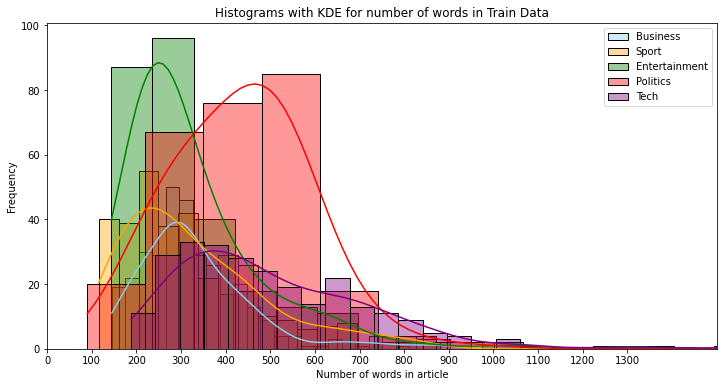

In [49]:
%matplotlib inline
plt.figure(figsize=(12, 6))

business_data = train_df["n_words"][train_df["Category"] == "business"]
sport_data = train_df["n_words"][train_df["Category"] == "sport"]
entertainment_data = train_df["n_words"][train_df["Category"] == "entertainment"]
politics_data = train_df["n_words"][train_df["Category"] == "politics"]
tech_data = train_df["n_words"][train_df["Category"] == "tech"]

sns.histplot(business_data, kde=True, color='skyblue', bins=25, alpha=0.4, label="Business")
sns.histplot(sport_data, kde=True, color='orange', bins=35, alpha=0.4, label="Sport")
sns.histplot(entertainment_data, kde=True, color='green', bins=25, alpha=0.4, label="Entertainment")
sns.histplot(politics_data, kde=True, color='red', bins=25, alpha=0.4, label="Politics")
sns.histplot(tech_data, kde=True, color='purple', bins=25, alpha=0.4, label="Tech")

plt.xlabel("Number of words in article")
plt.ylabel("Frequency")
plt.title("Histograms with KDE for number of words in Train Data")
plt.xlim(0, 1500)
plt.xticks(np.arange(0, 1400, 100))

plt.legend()

plt.show()

In [11]:
#standard deviations of number of words

train_df.groupby("Category").agg("n_words").describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
business,336.0,334.17,133.53,145.0,253.00,304.0,391.25,902.0
entertainment,273.0,333.91,203.89,144.0,229.00,272.0,380.00,2448.0
politics,274.0,449.69,258.84,90.0,319.25,441.5,527.00,3345.0
sport,346.0,335.35,185.44,116.0,210.25,294.5,412.75,1671.0
tech,261.0,501.86,211.67,188.0,340.00,457.0,633.00,1549.0


### Analysis of words

## TODO:

 - Remove most frequent and common words in English from wordclouds

### Removing stop-words

An English stopwords list typically includes common words that carry little semantic meaning and are often excluded during text analysis. Examples of these words are “the,” “and,” “is,” “in,” “for,” and “it.” These stopwords are frequently removed to focus on more meaningful terms when processing text data in natural language processing tasks such as text classification or sentiment analysis.

article - https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

In [12]:
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
STOP_WORDS = stopwords.words('english')


STOP_WORDS[:15]

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/stanislav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

In [13]:
import wordcloud

def ignore_stop_words(string, stop_words):
    
    filtered_sentence = ""
    
    for word in string.split():
        
        if word.lower() not in stop_words:
            filtered_sentence += " " + word
            
    return (filtered_sentence)



def build_wordcloud(df, category, cmap=None):
    
    text_data = " ".join(df["Text_filtered"][train_df["Category"] == category].dropna())

    # Create a WordCloud object
    wcloud = wordcloud.WordCloud(width=1200, height=800, background_color="white", colormap=cmap).generate(text_data)

    # Display the word cloud using Matplotlib
    plt.figure(figsize=(12, 8))
    plt.title(f"Wordcloud for {category} category", fontsize=20)
    plt.imshow(wcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis labels
    plt.show()
    


train_df["Text_filtered"] = train_df["Text"].apply(ignore_stop_words, args=[STOP_WORDS])
test_df["Text_filtered"] = test_df["Text"].apply(ignore_stop_words, args=[STOP_WORDS])

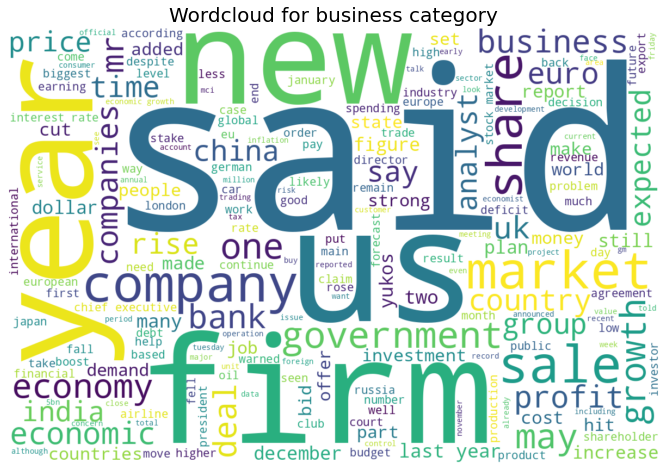

In [53]:
build_wordcloud(train_df, "business")


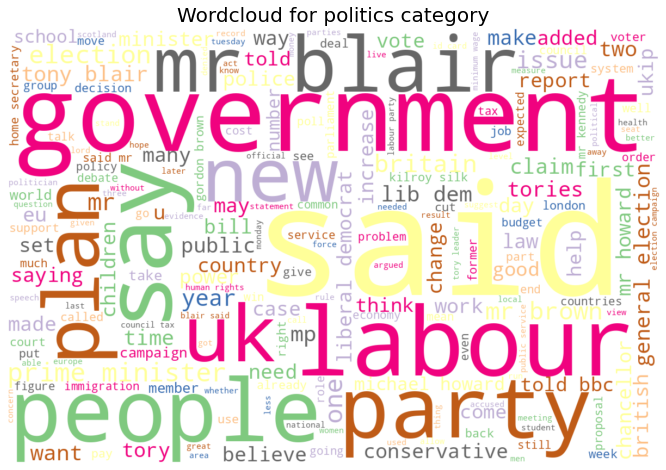

In [54]:
build_wordcloud(train_df, "politics", cmap="Accent")

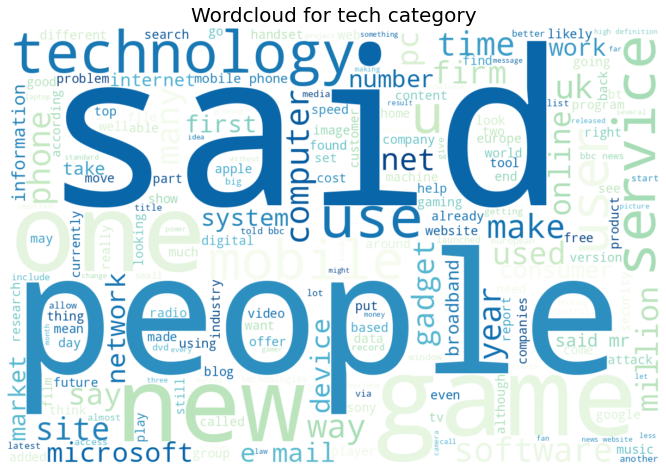

In [55]:
build_wordcloud(train_df, "tech", cmap="GnBu")

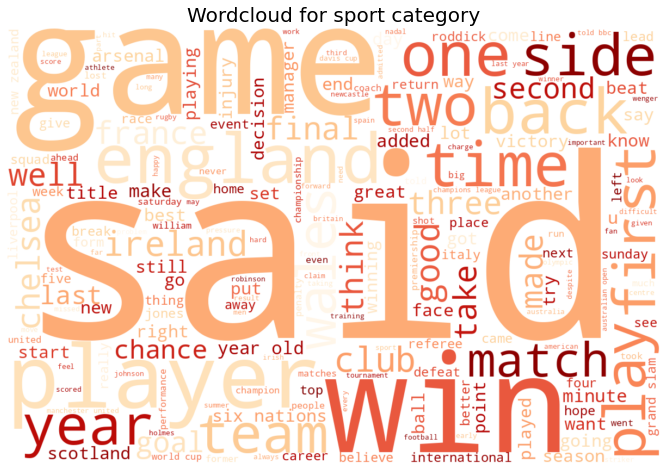

In [56]:
build_wordcloud(train_df, "sport", cmap="OrRd")

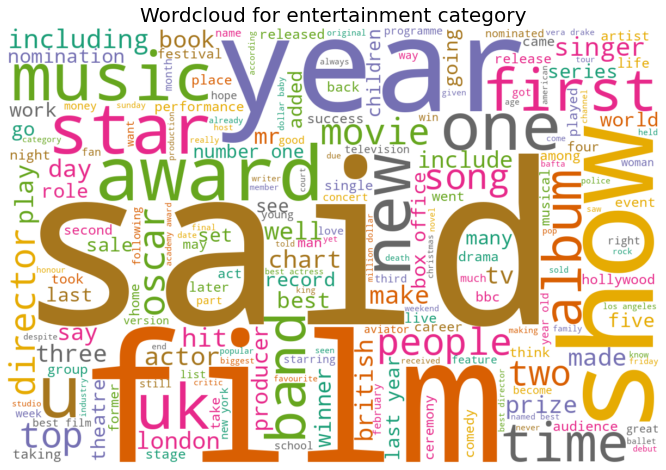

In [57]:
build_wordcloud(train_df, "entertainment", cmap="Dark2")

## Preprocessing

### Splitting on train/validation data

In [63]:
from sklearn.model_selection import train_test_split


text_train, text_val, labels_train, labels_val = train_test_split(train_df["Text_filtered"],
                                                                  train_df["Category"],
                                                                  test_size=0.2,
                                                                  random_state=1)




### Preprocessing

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(stop_words=STOP_WORDS,
                             max_features=3000,
                             max_df=0.8,
                             min_df=0.001
                             )

vectorizer.fit(text_train)

words = vectorizer.get_feature_names_out()


cool example - https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py

In [85]:
train_tfidf_matrix = vectorizer.transform(text_train)
val_tfidf_matrix = vectorizer.transform(text_val)


print(f"Sparsity rate of train matrix: {1 - train_tfidf_matrix.count_nonzero() /(train_tfidf_matrix.shape[0] * train_tfidf_matrix.shape[1]) }")
train_tfidf_matrix

Sparsity rate of train matrix: 0.9627125279642058


<1192x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 133340 stored elements in Compressed Sparse Row format>

In [86]:
print(f"Sparsity rate of test matrix: {1 - val_tfidf_matrix.count_nonzero() /(val_tfidf_matrix.shape[0] * val_tfidf_matrix.shape[1]) }")
val_tfidf_matrix

Sparsity rate of test matrix: 0.9630313199105145


<298x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 33050 stored elements in Compressed Sparse Row format>

### NMF (Non-negative matrix factorization)


In [110]:
from sklearn.decomposition import NMF



nmf_decomposer = NMF(n_components=5, solver='cd',
                     max_iter=1000, beta_loss='frobenius')


W_train = nmf_decomposer.fit_transform(train_tfidf_matrix)
H_train = nmf_decomposer.components_



In [121]:

top_words_count = 20
list_of_words = []
list_of_weights = []

for topic_idx, topic in enumerate(H_train):
    top_word_indices = topic.argsort()[-top_words_count:][::-1]
    top_words = [words[i] for i in top_word_indices]
    top_weights = [topic[i] for i in top_word_indices]
    
    list_of_words.append(top_words)
    list_of_weights.append(top_weights)
    
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}\n")


Topic 1: growth, economy, us, year, sales, market, oil, bank, economic, 2004, china, prices, rates, dollar, rate, rise, shares, figures, quarter, profits

Topic 2: mr, labour, blair, election, party, brown, would, howard, minister, government, tax, prime, tory, campaign, chancellor, tories, kennedy, lib, leader, tony

Topic 3: england, game, win, ireland, first, cup, wales, side, france, final, chelsea, team, back, play, match, injury, players, time, six, season

Topic 4: film, best, awards, actor, award, actress, festival, films, oscar, director, star, nominated, movie, comedy, aviator, hollywood, stars, named, year, british

Topic 5: mobile, people, music, technology, digital, phone, software, users, phones, microsoft, broadband, net, online, service, tv, video, new, services, search, use



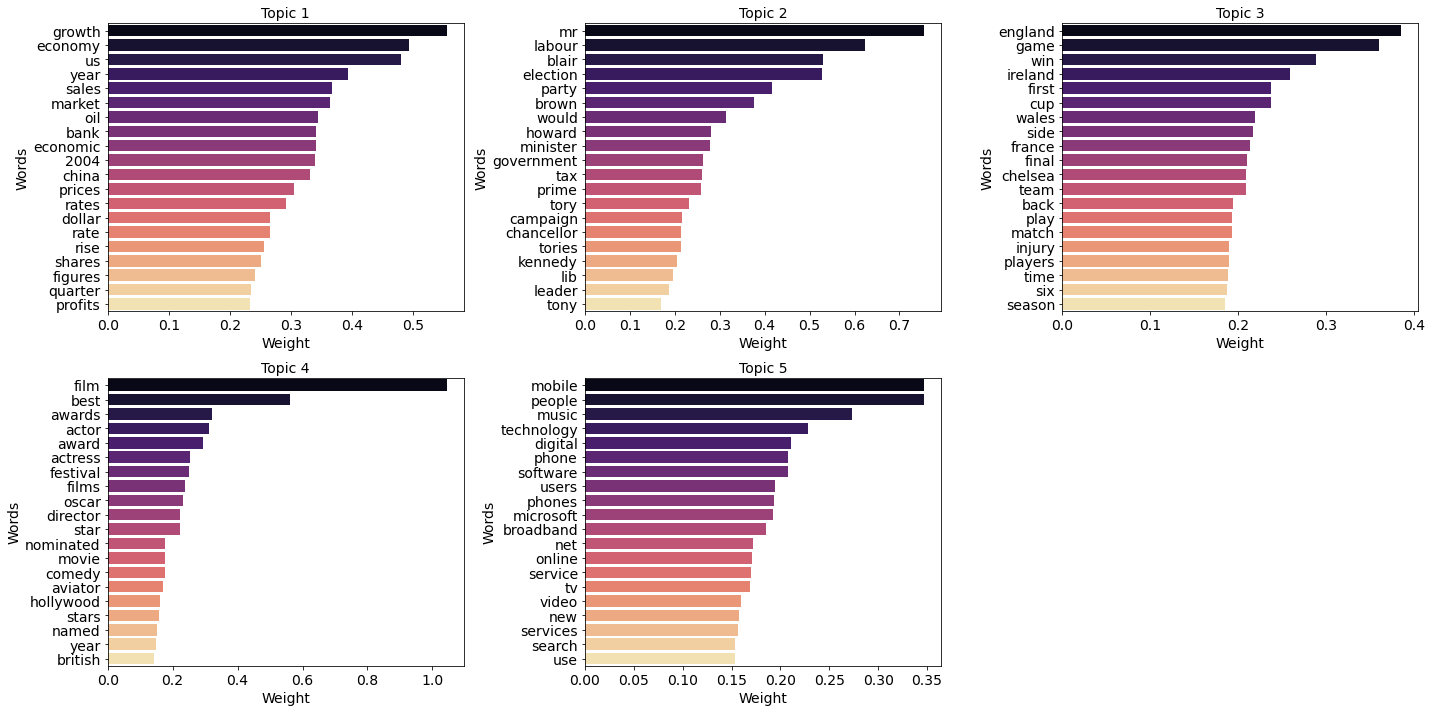

In [136]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()

for topic_idx, (topic_words, topic_weights) in enumerate(zip(list_of_words, list_of_weights)):
    top_words = topic_words[:top_words_count]
    top_weights = topic_weights[:top_words_count]
    
    sns.barplot(x=top_weights, y=top_words, ax=axes[topic_idx], palette="magma")
    
    axes[topic_idx].set_title(f"Topic {topic_idx + 1}", fontsize=14)
    axes[topic_idx].tick_params(axis='both', which='major', labelsize=14)
    axes[topic_idx].set_xlabel('Weight', fontsize=14)
    axes[topic_idx].set_ylabel('Words', fontsize=14)

for i in range(len(list_of_words), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()